# Data Import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# !pip install darts
# change wd
import os
os.chdir('/content/drive/MyDrive/TS')


# Data Preprocessing

In [ ]:
import pandas as pd

df = pd.read_csv('HouseValue_City.csv')
df = df[(df['SizeRank']< 3) | (df['RegionName'] == 'Pittsburgh')]
df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,239187.482296,240460.394141,...,740927.452710,742999.663666,747257.722359,751921.234200,755161.925875,755923.504975,757096.814971,759893.660439,763327.772469,766160.236916
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,216790.439158,217118.683483,...,939348.616281,932029.945998,925544.142242,924168.252444,925340.135622,925509.533162,928197.202052,933702.872675,941375.876651,947245.392501
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,99841.500842,99816.133741,...,261967.004096,262473.875312,263467.412397,264505.902073,265140.394029,265071.652657,264695.081675,264254.122004,263864.669357,263315.129793
31,26529,31,Pittsburgh,city,PA,PA,"Pittsburgh, PA",Allegheny County,74509.138250,74558.586765,...,223367.954506,223965.709733,224779.054824,226143.534986,227794.403791,229287.661605,229625.151187,228800.519932,227855.915177,227438.788313


In [ ]:
from darts import TimeSeries

# Step 1: Separate metadata and timeseries
metadata_cols = df.columns[:7]
timeseries_cols = df.columns[8:]
metadata = df[metadata_cols]
timeseries_data = df[timeseries_cols]
timeseries_data


# Step 2: Create TimeSeries objects for different cities
cities = metadata['RegionName'].unique()
timeseries_dict = {}

for city in cities:
    city_data = timeseries_data[metadata['RegionName'] == city].T  # Transpose to have dates as rows
    city_data.columns = [city]  # Rename the column
    city_data.index = pd.to_datetime(timeseries_cols)  # Set the index as datetime
    timeseries_dict[city] = TimeSeries.from_dataframe(city_data, value_cols=city)

timeseries_dict

{'New York': <TimeSeries (DataArray) (time: 298, component: 1, sample: 1)> Size: 2kB
 array([[[239187.48229552]],
 
        [[240460.39414111]],
 
        [[241763.44464296]],
 
        [[244270.73830049]],
 
        [[246815.78425057]],
 
        [[249551.38322956]],
 
        [[252453.33740395]],
 
        [[255176.22491183]],
 
        [[257742.45121315]],
 
        [[260433.88670478]],
 
 ...
 
        [[740927.45271008]],
 
        [[742999.66366616]],
 
        [[747257.72235917]],
 
        [[751921.23419995]],
 
        [[755161.92587525]],
 
        [[755923.50497507]],
 
        [[757096.81497089]],
 
        [[759893.66043906]],
 
        [[763327.77246899]],
 
        [[766160.23691645]]])
 Coordinates:
   * time       (time) datetime64[ns] 2kB 2000-01-31 2000-02-29 ... 2024-10-31
   * component  (component) object 8B 'New York'
 Dimensions without coordinates: sample
 Attributes:
     static_covariates:  None
     hierarchy:          None,
 'Los Angeles': <TimeSeries (Data

# Model

Processing New York...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


ARIMA MAE for New York: 14620.14054777769
ExponentialSmoothing MAE for New York: 50338.63507293883
XGBModel MAE for New York: 34274.02425759096
NaiveMean MAE for New York: 276405.514702497


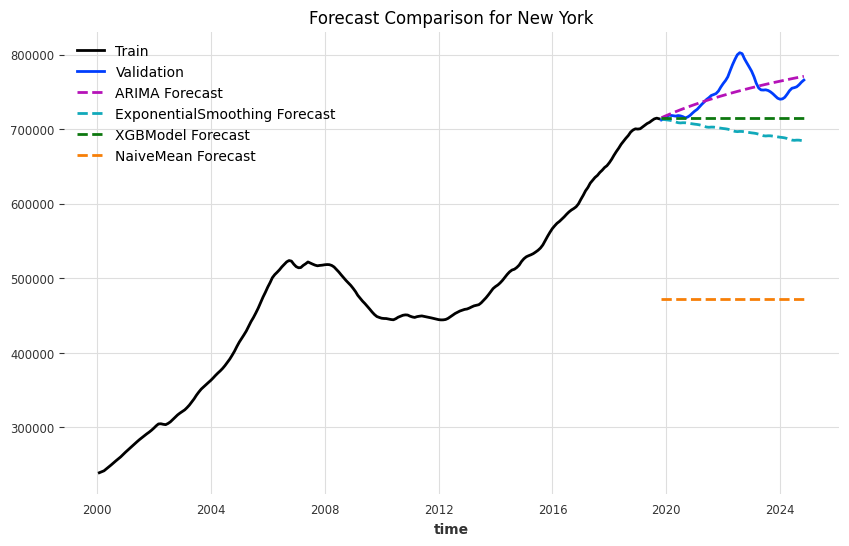

Processing Los Angeles...
ARIMA MAE for Los Angeles: 116608.99978995697
ExponentialSmoothing MAE for Los Angeles: 82674.08007645079


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


XGBModel MAE for Los Angeles: 171154.2536488909
NaiveMean MAE for Los Angeles: 398452.4582870292


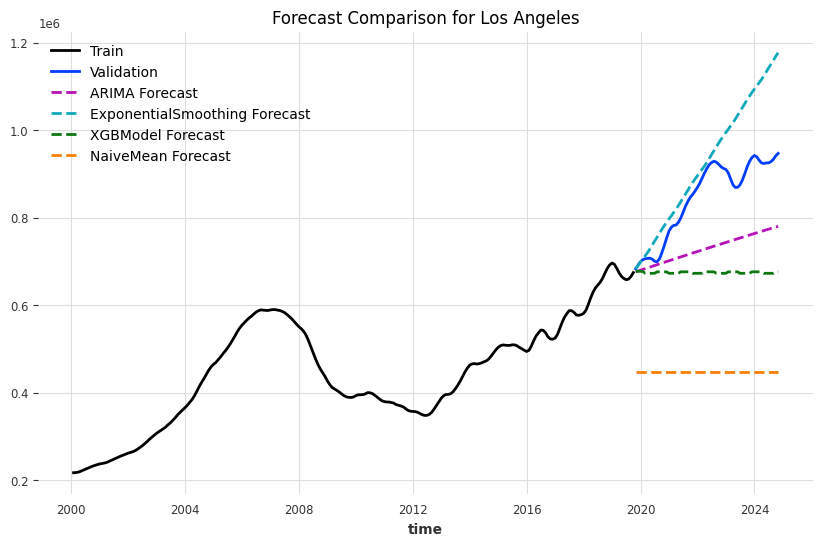

Processing Houston...
ARIMA MAE for Houston: 41975.1856026354
ExponentialSmoothing MAE for Houston: 32773.09218792732
XGBModel MAE for Houston: 48211.5836727779
NaiveMean MAE for Houston: 106876.47213303145


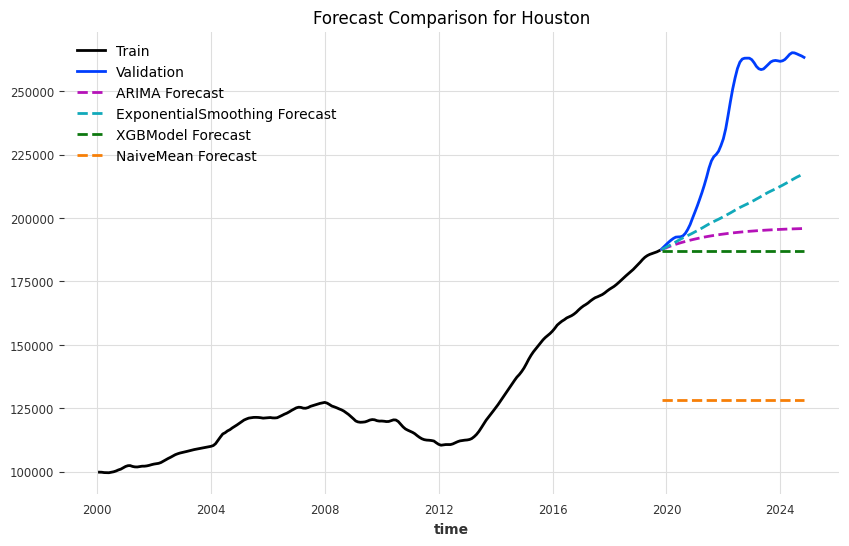

Processing Pittsburgh...
ARIMA MAE for Pittsburgh: 25962.047175388117
ExponentialSmoothing MAE for Pittsburgh: 47328.37332944991
XGBModel MAE for Pittsburgh: 37288.989333413185
NaiveMean MAE for Pittsburgh: 97535.71288876477


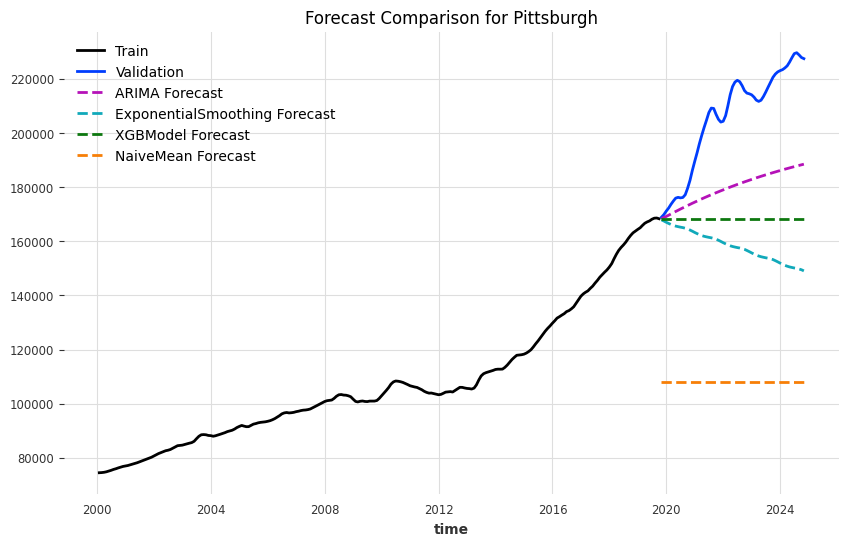


Comparison of MAE Scores:

City: New York
  ARIMA: 14620.14054777769
  ExponentialSmoothing: 50338.63507293883
  XGBModel: 34274.02425759096
  NaiveMean: 276405.514702497

City: Los Angeles
  ARIMA: 116608.99978995697
  ExponentialSmoothing: 82674.08007645079
  XGBModel: 171154.2536488909
  NaiveMean: 398452.4582870292

City: Houston
  ARIMA: 41975.1856026354
  ExponentialSmoothing: 32773.09218792732
  XGBModel: 48211.5836727779
  NaiveMean: 106876.47213303145

City: Pittsburgh
  ARIMA: 25962.047175388117
  ExponentialSmoothing: 47328.37332944991
  XGBModel: 37288.989333413185
  NaiveMean: 97535.71288876477


In [ ]:
from darts.models import ARIMA, ExponentialSmoothing, XGBModel, NaiveMean
from darts.metrics import mae
import matplotlib.pyplot as plt


# Parameters for backtesting
backtest_window = 36  # Forecast window length (e.g., 36 months)
stride = 12           # Step size for each backtest iteration
initial_train_window = 200  # Minimum months for the initial training window

# Initialize a dictionary to store average MAE results
average_mae_results = {}


# Initialize a dictionary to store results
results = {}

# Loop through each city's time series
for city, ts in timeseries_dict.items():
    print(f"Processing {city}...")

    # Split into training and validation sets (80% train, 20% validation)
    train, val = ts.split_before(0.8)

    # Initialize models
    models = {
        "ARIMA": ARIMA(p=2, d=1, q=2),
        "ExponentialSmoothing": ExponentialSmoothing(),
        "XGBModel": XGBModel(lags=12),
        "NaiveMean": NaiveMean(),
    }

    forecasts = {}

    for model_name, model in models.items():
        # Fit the model
        model.fit(train)

        # Generate forecasts
        forecast = model.predict(len(val))
        forecasts[model_name] = forecast

        # Evaluate MAE
        mae_score = mae(val, forecast)
        print(f"{model_name} MAE for {city}: {mae_score}")

        # Store results for comparison
        if city not in results:
            results[city] = {}
        results[city][model_name] = mae_score

    # Visualization for the current city
    plt.figure(figsize=(10, 6))
    train.plot(label="Train")
    val.plot(label="Validation")
    for model_name, forecast in forecasts.items():
        forecast.plot(label=f"{model_name} Forecast", linestyle="--")
    plt.title(f"Forecast Comparison for {city}")
    plt.legend()
    plt.show()

# Display overall results
print("\nComparison of MAE Scores:")
for city, model_scores in results.items():
    print(f"\nCity: {city}")
    for model_name, score in model_scores.items():
        print(f"  {model_name}: {score}")


## Interpretation

* Best Model Across Cities:

  ARIMA generally performs better across cities in terms of MAE and validation alignment, indicating it is well-suited for time series with moderate complexity and trends.
* Exponential Smoothing:
  Overestimates in Los Angeles and underestimates in other cities, showing it may not adapt well to sharp changes.
* XGBModel:
  Tends to underestimate, possibly due to less effective feature engineering or the lag structure being suboptimal.

# Backtesting


Backtesting for New York...


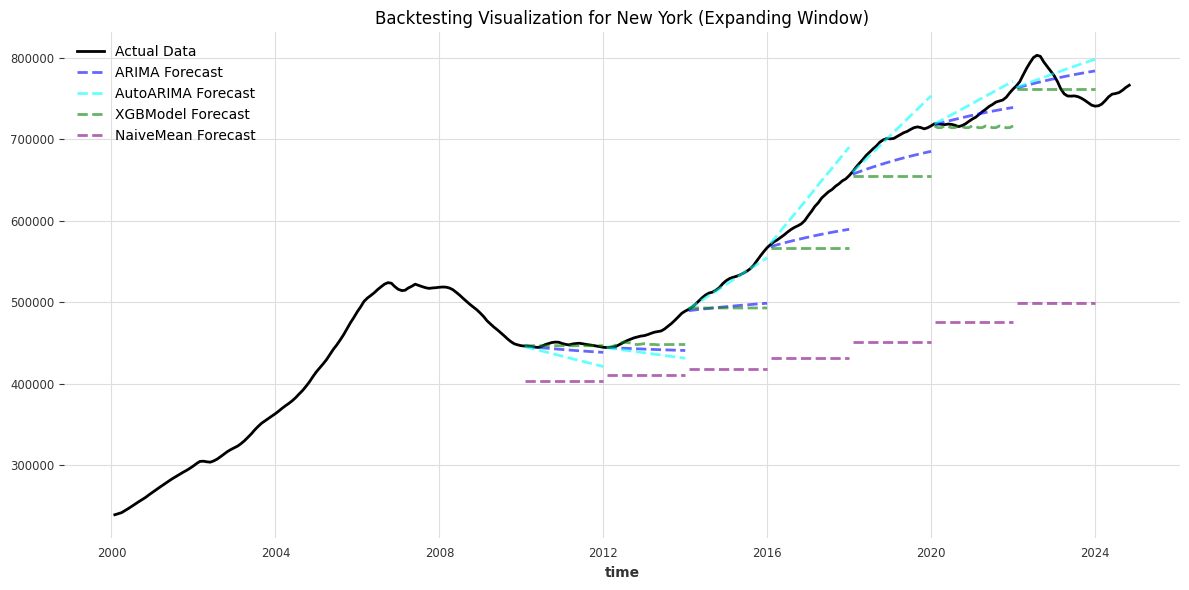


Average MAE for New York: {'ARIMA': 20472.516983041867, 'AutoARIMA': 16184.878186730803, 'XGBModel': 24280.57783478904, 'NaiveMean': 165272.87271093615}

Backtesting for Los Angeles...


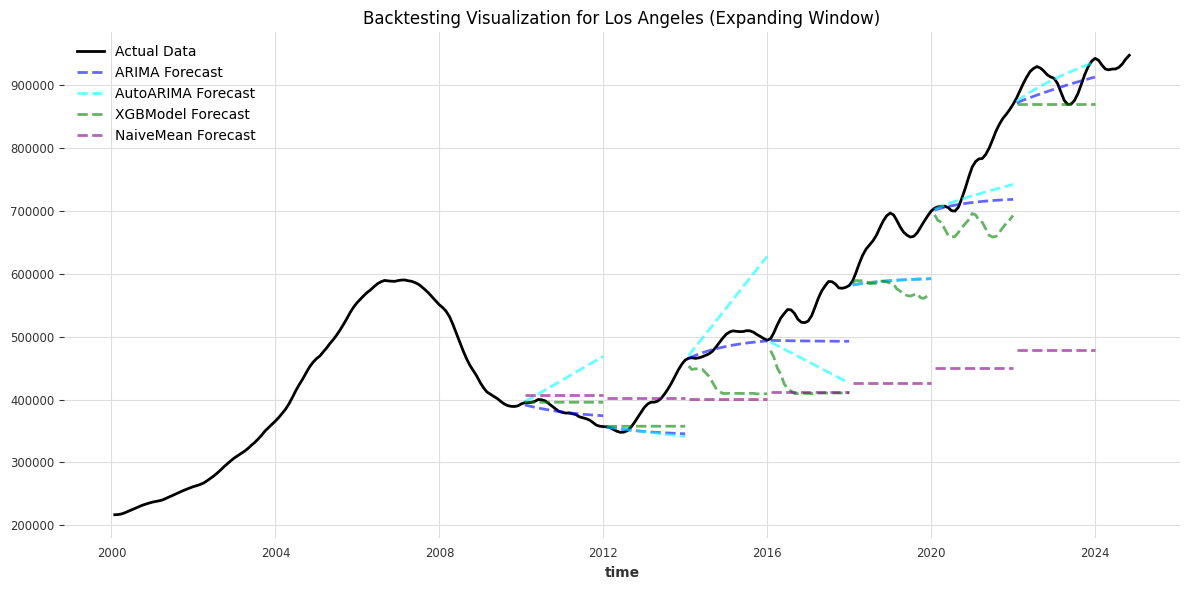


Average MAE for Los Angeles: {'ARIMA': 38980.547023042665, 'AutoARIMA': 55437.19129311381, 'XGBModel': 66516.69936145817, 'NaiveMean': 180910.15903801727}

Backtesting for Houston...


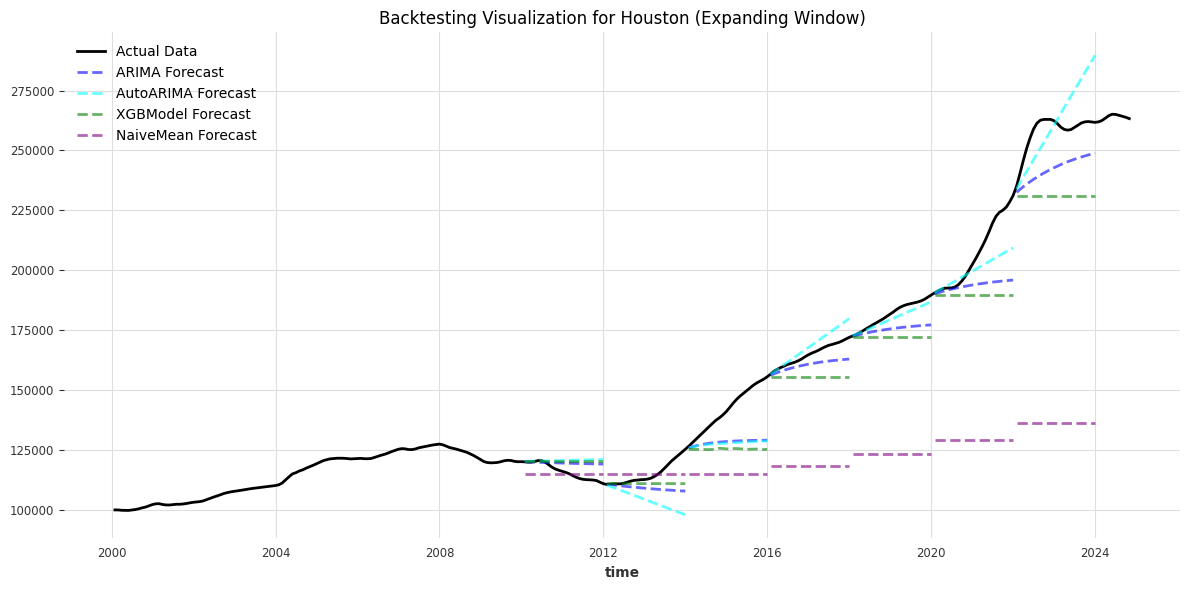


Average MAE for Houston: {'ARIMA': 8942.340058718477, 'AutoARIMA': 7797.558212455423, 'XGBModel': 12499.190240531067, 'NaiveMean': 48220.1532602557}

Backtesting for Pittsburgh...


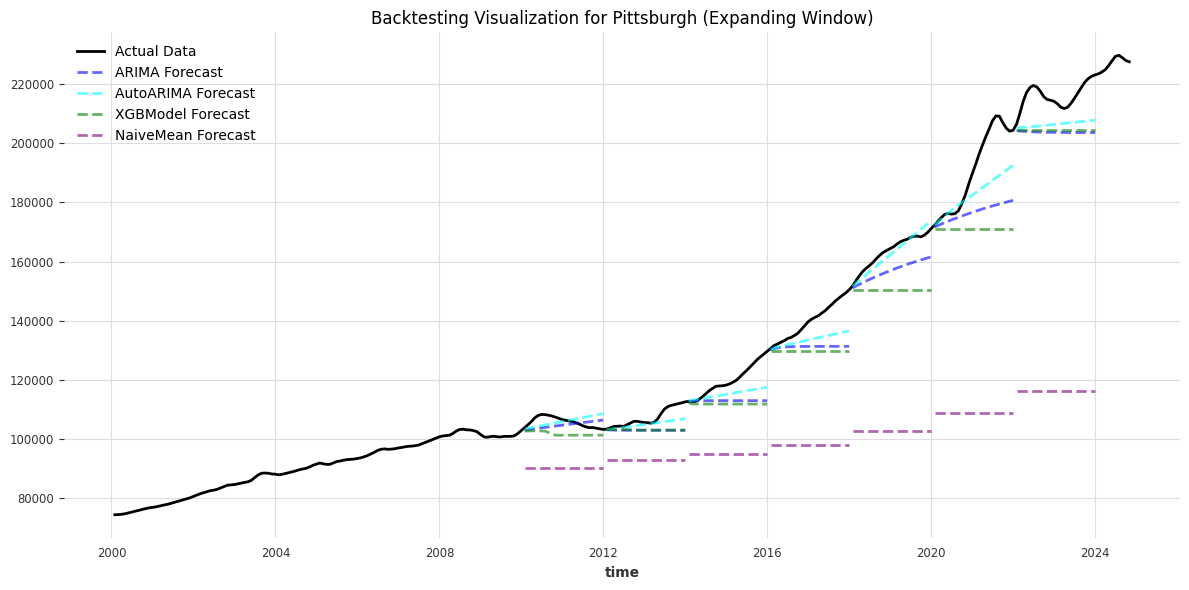


Average MAE for Pittsburgh: {'ARIMA': 7868.510027263422, 'AutoARIMA': 5070.8049886846475, 'XGBModel': 10055.620047414672, 'NaiveMean': 48332.42357486997}


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="statsmodels")
from darts.models import ARIMA, ExponentialSmoothing, XGBModel, NaiveMean, TCNModel, AutoARIMA, RNNModel
from darts.metrics import mae
from darts.metrics import mae
import matplotlib.pyplot as plt
import numpy as np

# Parameters for backtesting
backtest_window = 24  # Forecast window length (e.g., 36 months)
stride = 24           # Step size for each backtest iteration
initial_train_window = 120  # Minimum months for the initial training window

# Initialize a dictionary to store average MAE results
average_mae_results = {}

# Define fixed colors for models
model_colors = {
    "ARIMA": "blue",
    "AutoARIMA": "cyan",
    "XGBModel": "green",
    "NaiveMean": "purple",
}

# Perform backtesting for each city
for city, ts in timeseries_dict.items():
    print(f"\nBacktesting for {city}...")

    # Ensure `ts` is a TimeSeries object
    from darts import TimeSeries
    if not isinstance(ts, TimeSeries):
        ts = TimeSeries.from_series(ts)

    # Initialize models
    models = {
        "ARIMA": ARIMA(p=1, d=1, q=1),
        "AutoARIMA": AutoARIMA(),  # Auto-selects ARIMA parameters
        "XGBModel": XGBModel(lags=12),
        "NaiveMean": NaiveMean(),
    }

    # Initialize MAE storage for each model
    mae_scores = {model_name: [] for model_name in models.keys()}

    plt.figure(figsize=(12, 6))
    ts.plot(label="Actual Data", lw=2, color="black")  # Plot actual time series

    # For legend tracking
    legend_added = {model_name: False for model_name in models.keys()}

    # Expanding training window backtesting
    for start in range(0, len(ts) - initial_train_window - backtest_window, stride):
        train = ts[: start + initial_train_window]  # Expand the training window
        val = ts[start + initial_train_window : start + initial_train_window + backtest_window]  # Fixed validation window

        # Fit and forecast each model
        for model_name, model in models.items():
            try:
                model.fit(train)
                forecast = model.predict(len(val))

                # Calculate MAE and store it
                mae_score = mae(val, forecast)
                mae_scores[model_name].append(mae_score)

                # Plot forecast with specific color and a single label for each model
                forecast.plot(
                    label=f"{model_name} Forecast" if not legend_added[model_name] else None,
                    linestyle="--",
                    color=model_colors[model_name],
                    alpha=0.6
                )
                legend_added[model_name] = True

            except Exception as e:
                print(f"Model {model_name} encountered an error: {e}")

    # Finalize and display plot
    plt.title(f"Backtesting Visualization for {city} (Expanding Window)")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Calculate average MAE for each model
    average_mae_results[city] = {model_name: np.mean(scores) for model_name, scores in mae_scores.items()}
    print(f"\nAverage MAE for {city}: {average_mae_results[city]}")


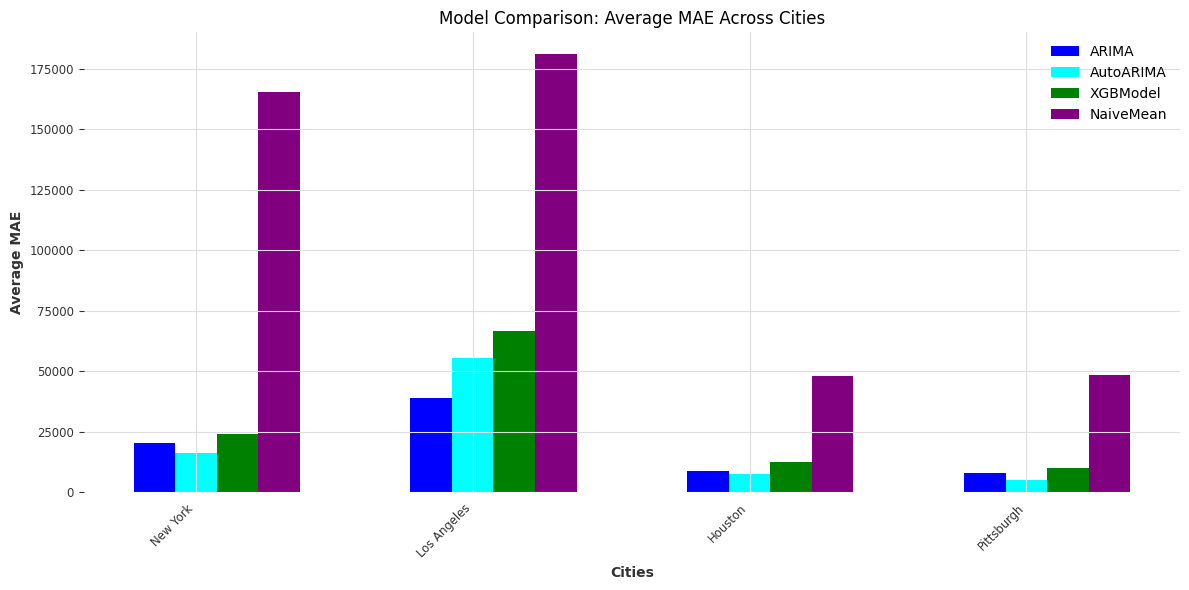

In [ ]:
# Visualize final average MAE across all cities
plt.figure(figsize=(12, 6))

cities = list(average_mae_results.keys())
models = list(model_colors.keys())

# Extract average MAE data
avg_mae_data = {model: [average_mae_results[city].get(model, float('inf')) for city in cities] for model in models}

# Plot a grouped bar chart
x = np.arange(len(cities))  # City indices for the x-axis
width = 0.15  # Width of each bar

for i, model in enumerate(models):
    plt.bar(x + i * width, avg_mae_data[model], width, label=model, color=model_colors[model])

# Add labels, title, and legend
plt.xlabel('Cities')
plt.ylabel('Average MAE')
plt.title('Model Comparison: Average MAE Across Cities')
plt.xticks(x + width, cities, rotation=45, ha='right')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


# Insight & Recommendations

* Best Model: AutoARIMA is the most reliable model across cities, achieving the lowest MAE consistently.

* XGBModel Use Case: While XGBModel may not outperform ARIMA-based models for general real estate price forecasting, it could benefit from additional feature engineering and external economic indicators to improve performance.

* NaiveMean Insights: This model serves as a baseline for comparison and highlights the importance of using more sophisticated methods for time series forecasting.

# Business Application

The models (AutoARIMA, ARIMA, XGBModel) enable precise real estate price forecasting, empowering real estate agents, investors, and homeowners to make informed decisions. By integrating these models into a user-friendly platform, the tool provides localized insights, identifies profitable opportunities, and reduces financial risks in volatile markets. Backtesting validates the models’ reliability, ensuring trust in the predictions and enhancing user confidence. This differentiates the product from competitors, offering time savings, cost efficiency, and actionable insights for strategic market decisions.

# Next Step

Integrate the best-performing model into the platform. Develop an interface allowing stakeholders to select locations and input their budget. The system will leverage the model to forecast prices and calculate ROI, providing actionable insights for informed decision-making.